# Theory


## The importance of normalizing data

if your model is based on several numerial attributes - are they comparable?
- Ages may range from 0-100, incomes to 0-billions
- Some models may not perform well when different attributes are on very different scales
- It can result in some attributes couting more than others (like in te mean)
- Bias in the attributes can also be a problem

## Examples
- Scikit-learn PCA have in-build numerical normalizing (whiten option)
- Scikit-learn has a preprocessing module with handy normalize and scale functions
- Yes and No shold be 0 and 1

## Read the doc
- Most data mining and machine learning techniques work fine with raw, un-normalized data
- But it's allways good to check in the docs
- Re-scale the data when the work is done!

## Dealing with Outliers
- Sometimes it's appropriate to remove outliers from the training data
- Ex: in collaborative filtering, a single user who rates tousands of movies could have a big effect on everyones else's ratings. That may not be desirable.
- Ex: in web log data, outliers may represent bots or other agents that shold be discarded.
- Standard deviation can provide a principled way to classify outliesrs
- Its a way to find data points that are more than some multiple of a std in the training data
  


# Code

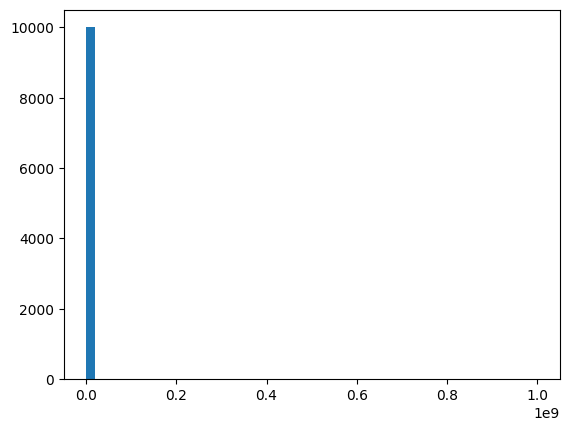

In [4]:
# Importa as bibliotecas necessárias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Gera uma distribuição normal de rendas (média 27.000, desvio padrão 15.000) para 10.000 pessoas
incomes = np.random.normal(27000, 15000, 10000)
# Adiciona um valor anômalo/extremo (outlier) à lista de rendas
incomes = np.append(incomes, [1000000000])

# Plota o histograma 
plt.hist(incomes, 50)
plt.show()


In [5]:
# Media dos valores
incomes.mean()

127054.8843927874

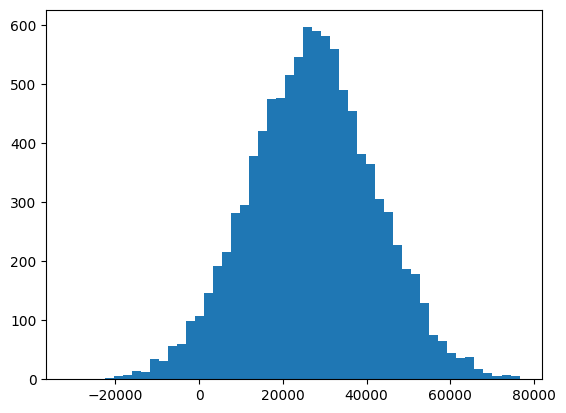

In [6]:
# Função que remove outliers
def reject_outliers(data):
    # Mediana dos dados
    u = np.median(data)
    # Desvio padrao dos dados
    s = np.std(data)
    # Filtra dados que estão nos 2 desvios padroes da mediana
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered
    
# Executa a função para os dados gerados anteriormente
filtered = reject_outliers(incomes)

# plota o histograma
plt.hist(filtered, 50)
plt.show()

In [7]:
np.mean(filtered)

27067.589881226682

## Activity

In [11]:
# Função que adiciona outliers com base no desvio padrao
def add_outliers(data, num_outliers, std_multiplier):
    mean = np.mean(data)
    std_dev = np.std(data)
    # Gera os outliers utilizando uma distribuição normal, com a media sendo alterada
    outliers = np.random.normal(mean + std_multiplier * std_dev, std_dev, num_outliers)
    return np.append(data, outliers)

Mean: 27150.01967585716


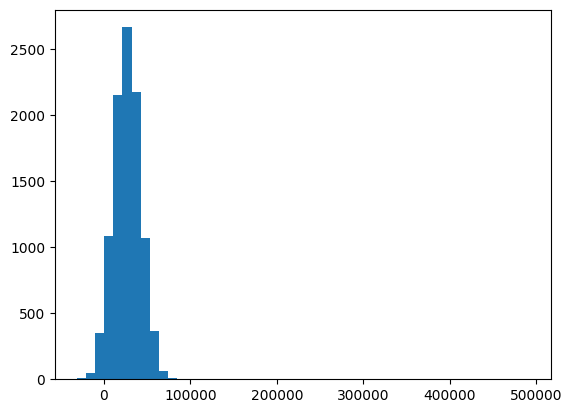

In [13]:
# Caso com 5 outliers com 30 desvios padroes de deslocamento
incomes_case_1 = add_outliers(incomes, 5, 30)

print(f'Mean: {incomes_case_1.mean()}')
plt.hist(incomes_case_1, 50)
plt.show()

Mean: 27064.448139154545


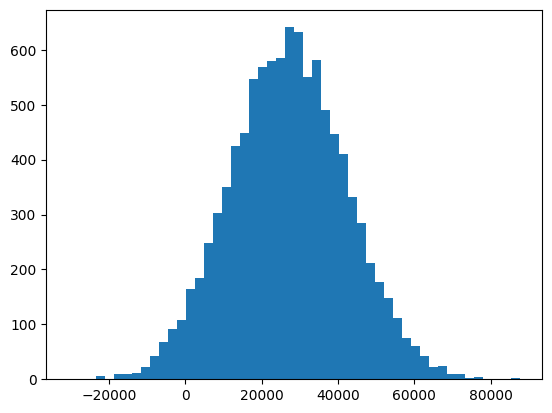

In [16]:
# Caso com 50 outliers com 2 desvios padroes de deslocamento
incomes_case_2 = add_outliers(incomes, 50, 2)

print(f'Mean: {incomes_case_2.mean()}')
plt.hist(incomes_case_2, 50)
plt.show()

Mean: 11924.728873049415


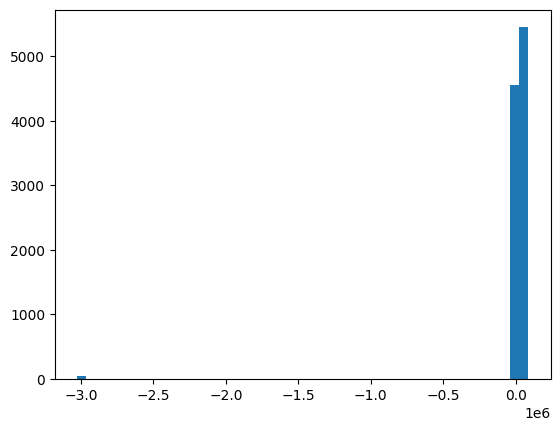

In [18]:
# Caso com 50 outliers com -200 desvios padroes de deslocamento
incomes_case_2 = add_outliers(incomes, 50, -200)

print(f'Mean: {incomes_case_2.mean()}')
plt.hist(incomes_case_2, 50)
plt.show()